In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

### Reception du bruit

In [38]:
time = 10
f = 44100
recording = sd.rec(time * f, samplerate=f,channels=1)
sd.wait()

### Visualisation

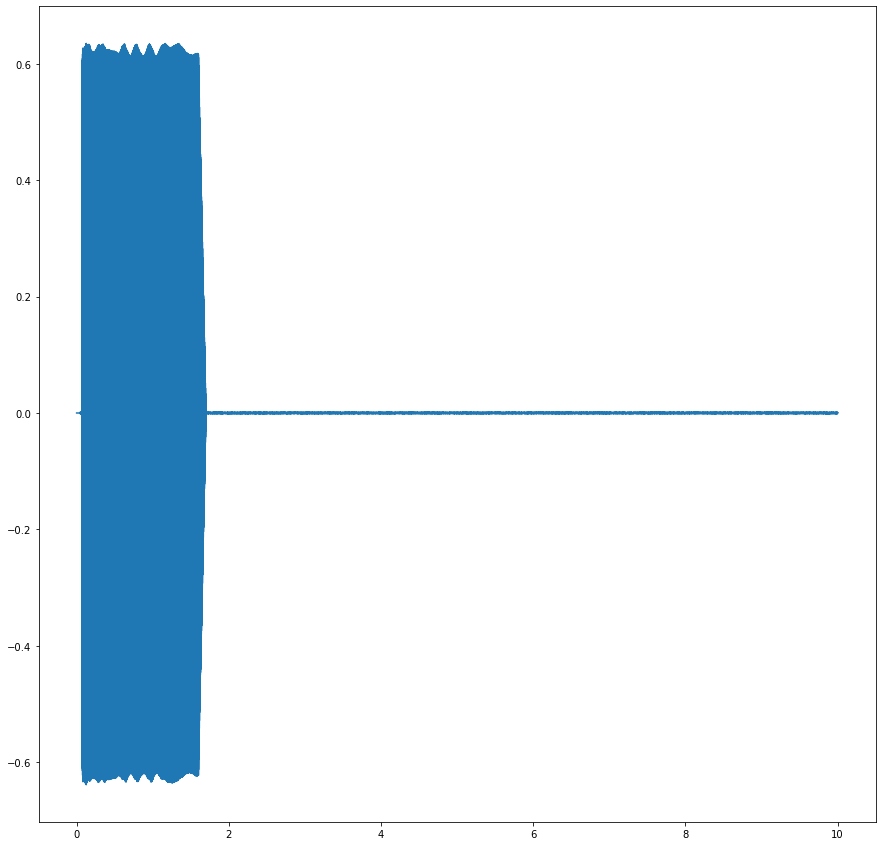

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
t = np.linspace(0, time, int(f * time), endpoint=False)
ax.plot(t,recording)


In [43]:
x=0
for i in range(len(recording)-1):
    if recording[i] > 0:
        if recording[i+1] < 0:
            x+=1
    elif recording[i] < 0:
        if recording[i+1] >0:
            x+=1
x*=2
Te=1/f

print(1/(Te*x))




0.22751426478326814
